In [1]:
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

In [2]:
root = r'C:\Users\vatti\OneDrive\Documents\Classes\HAP 880\Week_1'
os.chdir(root)

df = pd.read_csv('highUtilizationPredictionV2wco.csv')

In [3]:
df.isnull().values.any()

False

In [4]:
cols = df.columns.tolist()

In [5]:
x = pd.DataFrame(df[(df['race']=='B') & (df['age']== 70)])

In [6]:
cols_remove = ['race', 'patient_id', 'HighUtilizationY2', 'claimCount']

In [7]:
X = df[list(set(cols).difference(set(cols_remove)))]

In [8]:
y = df['HighUtilizationY2']

In [9]:
X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.33, random_state=42)

In [10]:
lr = LogisticRegression()

lr_train = lr.fit(X_train, y_train)
lr_train.coef_

c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 1.04211723e-02, -1.42050145e-01, -3.59670205e-02,
         3.26483540e-01,  3.68823167e-03,  2.01022301e-01,
        -6.16755541e-02,  3.62212349e-01,  2.08167964e-01,
         3.87483459e-01,  6.52163999e-03, -1.75525943e-01,
         7.73618242e-02,  6.25847420e-01,  2.76037696e-01,
        -4.31417579e-04,  1.47055411e-02,  7.28450361e-02,
         2.44370981e-01,  2.60226338e-02,  2.34283332e-01,
         7.23328185e-02,  3.02973560e-01,  3.45317994e-01,
         2.63763945e-01, -1.38983442e-01,  1.33664177e-02,
         1.52639848e-02, -6.67931822e-03, -5.30582692e-04,
         1.64459360e-02, -4.00636953e-02,  2.03567394e-02,
         5.11444090e-01,  3.79126488e-01,  4.19341887e-03,
        -1.62530487e-01,  1.02530660e-03, -1.78360937e-01,
        -9.86854892e-02,  1.23250557e-02,  9.93717649e-03,
         3.19025807e-02,  2.35326605e-01,  8.09149807e-01,
        -2.91421612e-03,  4.69148917e-01,  3.40062756e-02,
        -1.34232499e-03,  2.12859724e-03, -5.52584104e-0

In [11]:
lr_test = lr.fit (X_test, y_test)
lr_test.coef_

c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[-1.29972690e-02, -2.16847769e-01,  5.92977358e-02,
         3.70428073e-01, -1.53727057e-02,  2.84936738e-01,
        -1.89331176e-04,  4.12698399e-01,  1.52691690e-01,
         3.17190640e-01, -4.75228090e-02, -1.48527003e-01,
         1.07920241e-01,  5.55722914e-01,  2.47389140e-01,
         0.00000000e+00, -2.01138410e-02,  1.32068775e-01,
         1.97271822e-01,  1.43347296e-02,  1.55653777e-01,
         6.09617275e-02,  2.30742548e-01,  2.60125546e-01,
         2.00596091e-01, -2.08804813e-01, -4.69864180e-02,
         4.49525656e-02, -3.27532152e-02, -1.40404324e-03,
         1.65897715e-02,  1.74981401e-01, -1.51185896e-02,
         6.00345453e-01,  4.80058054e-01,  1.55796195e-02,
        -1.49032058e-01,  1.53626709e-01, -4.28422781e-02,
         4.04547204e-02,  3.25982148e-02,  9.02045743e-02,
         7.96035281e-02,  3.07960194e-01,  7.57193788e-01,
         0.00000000e+00,  4.50259024e-01,  2.18849438e-02,
        -2.47064302e-02, -2.76921119e-02, -5.17537613e-0

In [12]:
prob_train = lr_train.predict_proba (X_train)[:, 1]
prob_train

array([0.04485029, 0.02610687, 0.01870825, ..., 0.08377968, 0.26189275,
       0.11167146])

In [13]:
prob_test = lr_test.predict_proba (X_test)[:, 1]
prob_test

array([0.01210816, 0.03642419, 0.06286137, ..., 0.01098028, 0.02537956,
       0.00898991])

In [14]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, prob_train)

In [15]:
thresholds_train

array([1.90118124, 0.90118124, 0.83039596, ..., 0.00258711, 0.00258332,
       0.00198515])

In [16]:
auc_train = auc(fpr_train, tpr_train)
auc_train

0.8145161476263596

In [17]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, prob_test)

In [18]:
thresholds_test

array([1.85350714e+00, 8.53507143e-01, 8.32068688e-01, ...,
       3.00746214e-03, 2.96265547e-03, 1.72178023e-03])

In [19]:
auc_test = auc(fpr_test, tpr_test)
auc_test

0.8072731621470453

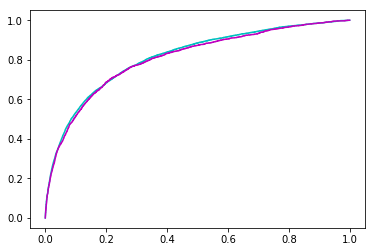

In [20]:
plt.plot(fpr_train, tpr_train, label="Train_Data, AUC="+str(auc_train), color = 'c')

plt.plot(fpr_test, tpr_test, label="Test_Data, AUC="+str(auc_test), color = 'm')

plt.show()